# *DATA SCIENCE / SECTION 2 / PROJECT*
---------

## **1. Context**

- 모바일 A사는 휴대폰을 만들기로 결심합니다.

- 하지만 전체시장의 20%점유율을 보유중인 삼성전자와, 애플 등과 같은 대기업과의 경쟁이 예상됩니다.

- 그래서 다양한 경쟁사의 핸드폰 기능이 담긴 데이터를 수집했습니다.

- 다양한 회사의 핸드폰 판매 데이터를 통해 핸드폰의 기능과 가격 간 관계를 알아보고 원가절감을 위한 방법과 대략적인 가격의 범위를 알아보고 싶습니다.

- 이를 통해 효과적인 전략으로 가격 경쟁을 할 수 있을 것으로 생각합니다.

### **목표**

- 핸드폰 가격의 범위 예측
- 데이터셋을 사용해 머신러닝 모델을 만든 후 성능 및 인사이트 결과를 만들고 공유하는 것.

## **2. 데이터 수집**
-----------
###**What?**

- [Mobile Price 데이터](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)
- Kaggle의 Mobile Price 데이터를 사용하겠습니다.

###**Why?**

- 여러종류의 핸드폰의 가격과 기능을 조사한 데이터 입니다.
- 이를 통해 핸드폰의 기능이 가격에 미치는 영향력을 알아 볼 수 있습니다.
- 또한 가격의 범위 예측을 통해 휴대폰 시장에서 어떤 가격 전략을 가져가야할지 의사결정에 도움이 될 것이라 생각합니다.

###**How?**

- 다중 분류 문제로 접근하겠습니다.
- 다양한 모델을 학습시키겠습니다.
- baseline model을 만들고, 최소 2개 이상의 모델을 만들어 검증을 통해 최적화 된 모델을 만들겠습니다.


In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
# os.environ사용해 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = "haewoonglee"
os.environ['KAGGLE_KEY'] = "fb29138b2f4a84ae2e43138b7a68b18e"

In [3]:
# Kaggle API 주소로 데이터 받아오기
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
!unzip '*.zip'

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 27.6MB/s]
Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [4]:
# 받아온 데이터 확인.
!ls

mobile-price-classification.zip  sample_data  test.csv	train.csv


In [5]:
# csv파일 읽기
df_train = pd.read_csv("train.csv") # 훈련데이터
df_test = pd.read_csv("test.csv") # test 데이터

In [6]:
# .head()를 활용해 상위 5행을 출력합니다.
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# .shape 속성을 이용하여 데이터 (행, 열) 크기를 출력합니다.
print("train (행, 열) =" , df_train.shape)
print("test (행, 열) =", df_test.shape)

train (행, 열) = (2000, 21)
test (행, 열) = (1000, 21)


In [8]:
# test 데이터 확인
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [9]:
# test데이터에서 id 항목 제거
df_test = df_test.drop("id", axis=1)
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [10]:
# .shape 속성을 이용하여 데이터 (행, 열) 크기를 출력합니다.
print("train (행, 열) =" , df_train.shape)
print("test (행, 열) =", df_test.shape)

train (행, 열) = (2000, 21)
test (행, 열) = (1000, 20)


In [11]:
# .info() 활용해 데이터에 대한 전반적인 정보를 살펴보겠습니다.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

###**데이터 구성**

- train, test로 분할된 데이터입니다.
- train (행, 열) = (2000, 21)
- test (행, 열) = (1000, 21)로 구성되 있습니다.
- int, float 형태의 데이터 타입으로 구성되 있으며, 결측값은 없는 것 같습니다.


###**Feature**

번호|변수명|설명|타입
-|-|-|-
 0  |battery_power |배터리 용량(mAh)       |int64  
 1  |blue           |블루투스 여부         |int64  
 2  |clock_speed    |명령을 실행하는 속도  |float64
 3  |dual_sim       |듀얼 sim카드 지원여부 |int64  
 4  |fc             |전면 카메라 픽셀      |int64  
 5  |four_g         |4G 여부               |int64  
 6  |int_memory     |내부 메모리 용량      |int64  
 7  |m_dep          |핸드폰 두께           |float64
 8  |mobile_wt      |핸드폰 무게           |int64  
 9  |n_cores        |핸드폰 무게           |int64  
 10 |pc             |기본카메라 메가픽셀   |int64  
 11 |px_height      |픽셀 해상도 높이      |int64  
 12 |px_width       |픽셀 해상도 너비      |int64  
 13 |ram            |메모리                |int64  
 14 |sc_h           |화면 높이(cm)         |int64  
 15 |sc_w           |화면 너비(cm)         |int64  
 16 |talk_time      |완충 후 사용시간      |int64  
 17 |three_g        |3G 여부               |int64  
 18 |touch_screen   |터치스크린 유무       |int64  
 19 |wifi           |와이파이 유무         |int64  
 20 |price_range    |0(저가), 1(중간), 2(고가), 3(최고가)   |int64  

## **3. 전처리 & DEA & Feature Engineering**

### 결측값 확인

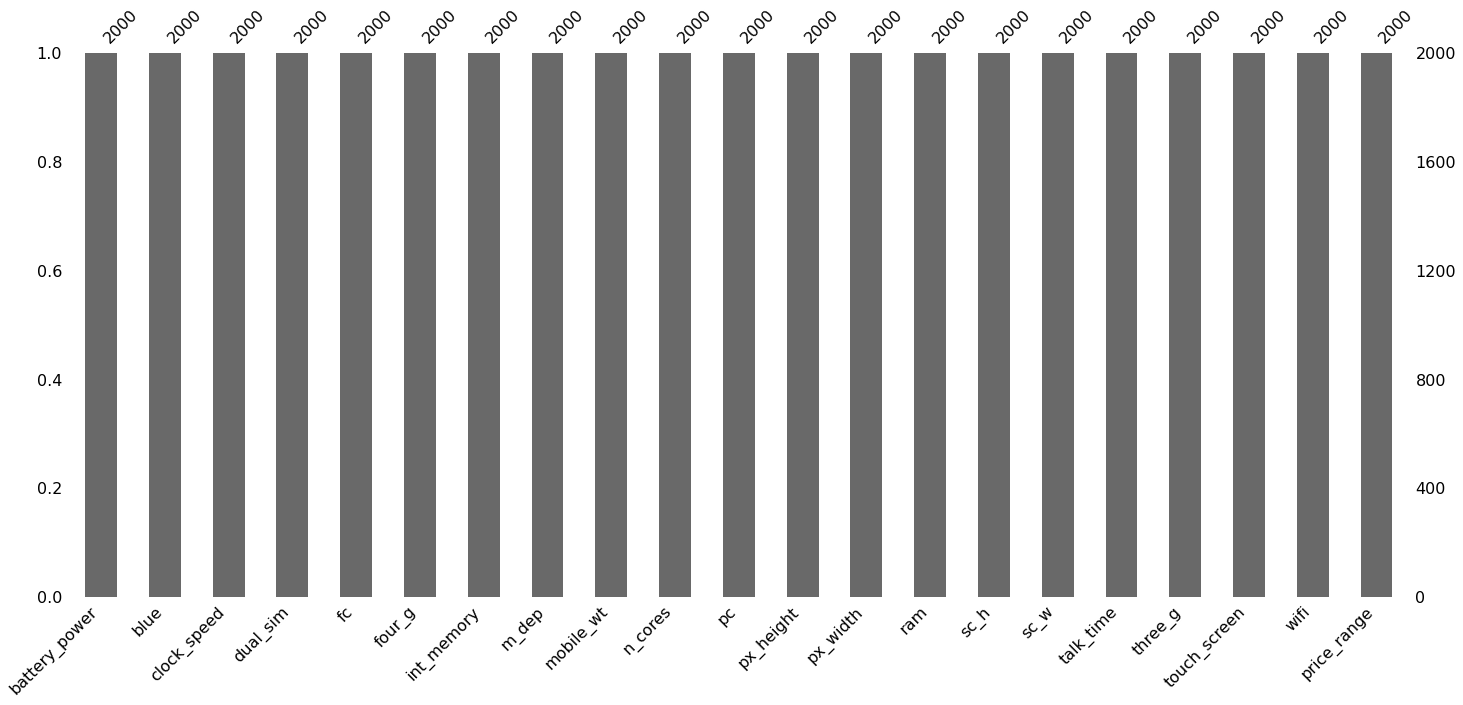

In [12]:
# missingno를 사용해 결측 데이터를 확인.
import missingno as msno

msno.bar(df_train)
plt.show();

In [13]:
# 결측치 확인
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 이상치 확인

In [14]:
# .describe() 함수를 이용해 요약 통게량을 출력합니다.
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


<Figure size 720x720 with 0 Axes>

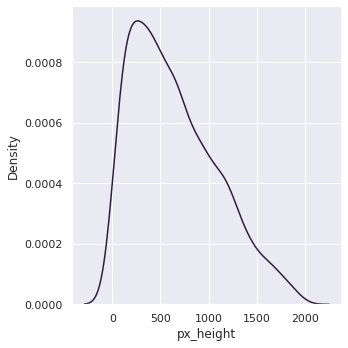

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize= (10, 10));
sns.displot(data = df_train, x = 'px_height', kind = 'kde', color='#331B3F');

<Figure size 864x720 with 0 Axes>

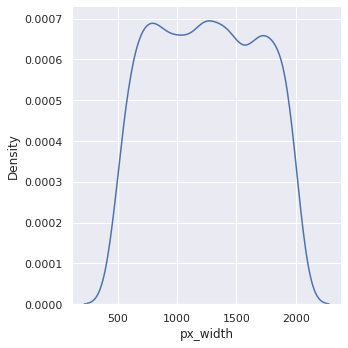

In [16]:
plt.figure(figsize= (12, 10));
sns.displot(x = df_train['px_width'], kind = 'kde');

<Figure size 864x720 with 0 Axes>

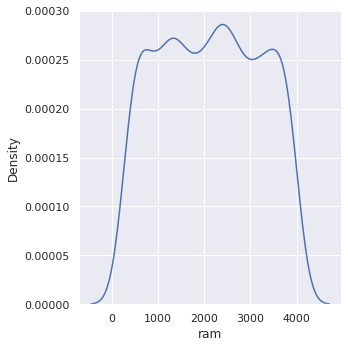

In [17]:
plt.figure(figsize= (12, 10));
sns.displot(x = df_train['ram'], kind = 'kde');

- 이상치와 결측값이 잘 정리된 데이터로 보입니다.
- 데이터의 분포 또한 문제가 많이 없어 보입니다.

### 타겟으로 사용할 특성 선택

- 휴대전화 기능에 따른 가격 범위를 예측하는 분류 모델을 구축하기 위해서 타겟은 가격 범위 정보를 가지고 있는 "price_range" 로 설정하겠습니다.

In [18]:
# 타겟 설정
target = "price_range"

In [19]:
df_train[target].value_counts(dropna=False, normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

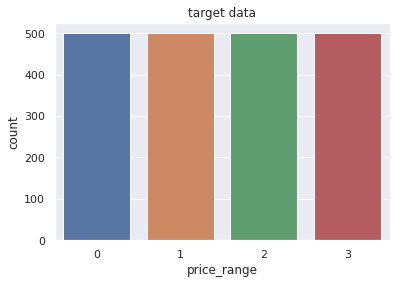

In [20]:
sns.countplot(x=target, data=df_train);
plt.title('target data');
plt.show();

- 총 4개의 클래스가 존재합니다.
- 0 : 저가, 1 : 보통, 2: 고가, 4: 최고가
- 다중분류 문제이며, 4개의 클래스의 비율이 각각 0.25로 정확도(accuracy)를 평가지표로 사용해도 괜찮을듯 합니다.

### **생각**

- 타겟 데이터의 형태가 고르게 분배되어 있고, 핸드폰의 기능중 가격에 영향을 가장 많이 미치는 요소가 무엇일지? 생각해봤습니다.

1. 핸드폰의 두께가 얇을수록 부품을 작게 만드는데 많은 기술이 필요하므로 가격 상승의 요인이 되지 않을까?

2. 명령을 실행하는 속도가 빠를 수록 코어와 메모리 성능이 올라가고 가격이 높아지지 않을까?

3. 핸드폰의 화면이 클수록 가격이 비싸지 않을까?

라는 생각을 해봤습니다. 우선 price_range와 관련 있는 Feature의 상관관계를 살펴 보겠습니다.

상관관계가 높다고 해서 무조건 인과관계가 있는 것을 아니기 떄문에 이점을 유의해 살펴 보겠습니다.

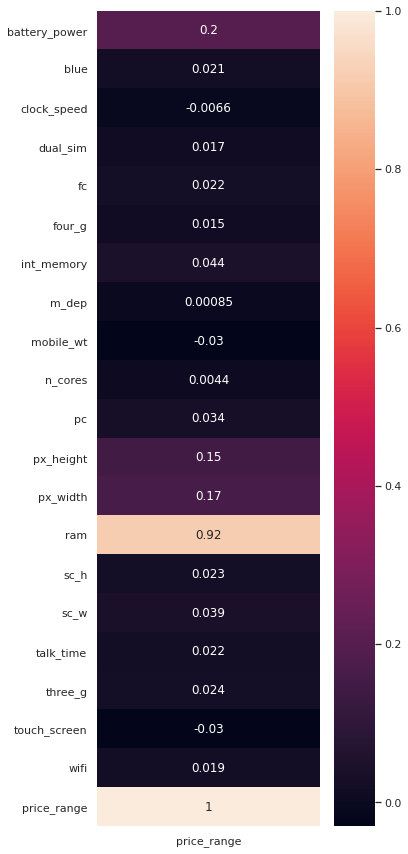

In [21]:
# price_range와 각 변수간의 상관관계
fig = plt.figure(figsize=(5,15))
sns.heatmap(df_train.corr()[['price_range']], annot=True);

### **상관관계 본 후**

- 핸드폰 가격에 영향을 많이 미치는 것이 ram인 것 같습니다.

- 0.92로 상당히 높은 수치값을 보여줍니다. 램(메모리)의 경우 CPU가 처리할 데이터가 임시로 저장되는 곳입니다. 램이 많을 수록 작업할 수 있는 작업대가 넓어지고 많아지므로 프로그램이 그만큼 빠르게 돌아가게 됩니다. 이에 램이 많아지면 성능이 좋은 핸드폰이므로 가격이 높아지는 것 같습니다.

- battery_power의 경우 배터리 용량이 클 수록 장시간 사용할 수 있으므로 가격이 높아지지 않을까 생각이 들었지만, talk_time(완충 후 사용시간)이 별다른 상관관계가 보이지 않아 배터리 자체의 가격이 높아서 높게 책정되는 것이 아닐까 생각이 듭니다.

- px height와 px width를 곱해서 해상도를 구할 수 있지 않을까 생각이 듭니다.

- 픽셀 수가 화질에 중요하지만 디스플레이의 선명도를 알기 위해서는 PPI를 확인해야하는데 어떻게 하면 PPI를 구할 수 있을지 생각해봐야합니다.

- 아무래도 핸드폰 특성상 시각적인 특성이 중요한데 그래서 px height와 px width 가 가격과 밀접한 상관관계가 그나마 높게 나오지 않았나 예상합니다.

- clock speed의 경우 - 상관관계를 보이는데 높은 클럭 속도를 가진 5년 전의 CPU가 더 낮은 클럭 속도를 가진 최신 CPU에 비해 성능이 떨어질 수도 있을 것 같습니다. 왜냐하면 최신 아키텍처가 명령을 더 효율적으로 처리하기 때문입니다. 이에 브랜드와 세대 안에서 프로세서를 비교해야할듯합니다.

### **PPI를 구해보자**
PPI(Pixel per Inch)계산법

PPI는 1인치당 픽셀이 몇 개로 이루어졌는지 나타내는 디스플레이 장치의 해상도 밀도 단위 입니다. 

10PPI면 정사각형 한 면 1inch(2.54cm)에 10개의 픽셀이 있고, 총 10x10 = 100개의 픽셀로 이루어져 있다는 뜻입니다.

계산을 위해서는 해상도와 화면길이(단위:인치)가 필요합니다.

해상도 (768X1561) (px width X px height) 화면길이 (sc_w X sc_h)

피타고라스 정리를 활용해 계산

$c^2 = a^2 + b^2$

$c = \sqrt{a^2 + b^2}$

PPI = 대각선 픽셀 수 / 대각선 길이

In [22]:
#diagonal 대각선 구하기 
diagonal= (df_train['sc_w']**2 + df_train['sc_h']**2)**0.5

In [23]:
#PPI 구하기
df_train['ppi'] = round(((df_train['px_width']**2 + df_train['px_height']**2)**0.5)/diagonal,0)
df_train['ppi'] = df_train['ppi'].astype(int)

In [24]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ppi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,66
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,127
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,191
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,121
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,165
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,146
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,204
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,36


In [25]:
# test 데이터에도 추가
diagonal = (df_test['sc_w']**2 + df_test['sc_h']**2)**0.5
#PPI 구하기
df_test['ppi'] = round(((df_test['px_width']**2 + df_test['px_height']**2)**0.5)/diagonal,0)
df_test['ppi'] = df_test['ppi'].astype(int)
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ppi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,103
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,189
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,95
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,178
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,65


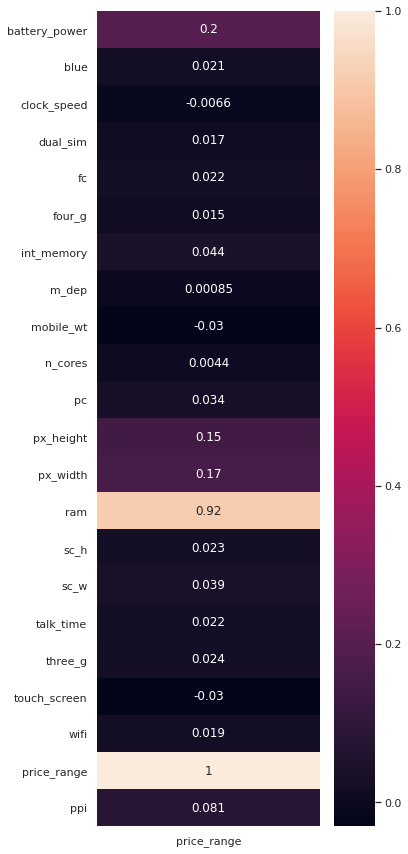

In [26]:
# 상관관계
fig = plt.figure(figsize=(5,15))
sns.heatmap(df_train.corr()[['price_range']], annot=True);

### **PPI**
- 생각보다 상관관계가 높지는 않습니다.
- 하지만 낮은 다른 변수에 비해 상관관계가 높은 편에 속하므로 사용해보도록 하겠습니다.

### **각 변수별 상관관계**

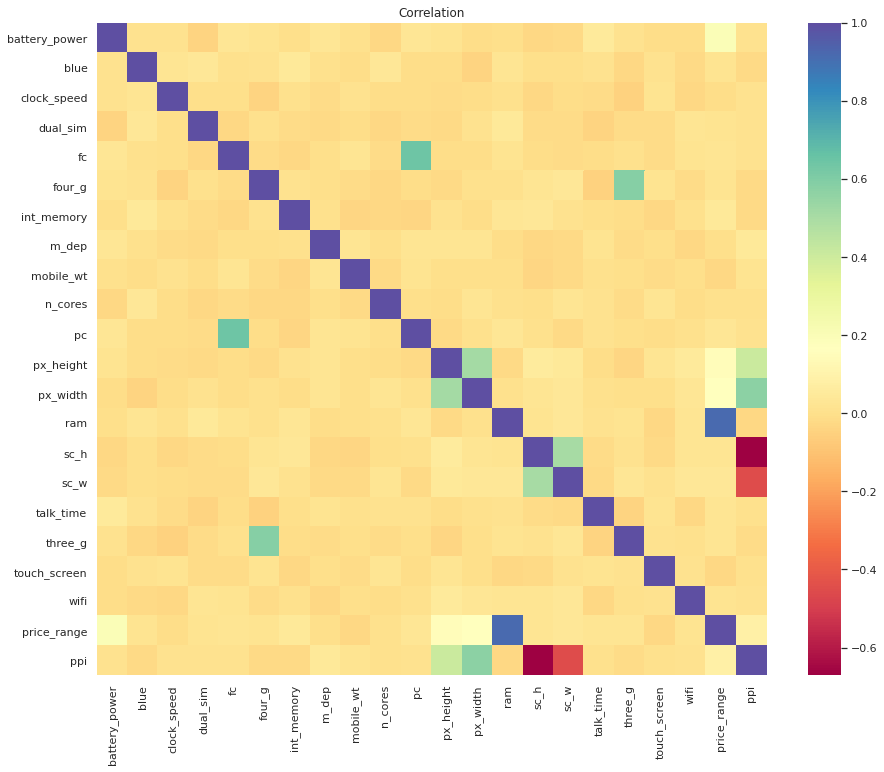

In [27]:
# 각 변수별 상관관계
corr=df_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Spectral')
r.set_title("Correlation");

- pc와 fc
>기본카메라 픽셀과 전면카메라 픽셀로 카메라와 관련된 변수이기에 상관관계가 있는 것으로 생각됩니다.

- four_g와 three_g
>통신망과 관련된 것으로 3G에서 4G로 넘어갔기에 4G폰에서는 3G도 지원되므로 상관관계가 있는 것으로 생각됩니다.

- sc_h와 sc_w
>화면 높이와 너비로 화면크기와 관련되어 있고 높이가 증가하면 너비도 당연히 증가합니다.

- ppi, px_height, px_width
>px_height, px_width로 ppi를 계산했으므로 상관관계가 나오는 것으로 보입니다.

**또한 ppi와 sc_h, sc_w와 상관관계가 거의 없는 것으로 보이는데 이는 화면크기가 크다고 해서 ppi가 높은 것은 아니다라는 생각이 듭니다.**

### **가격과 상관관계가 높은 ram 살펴보기**

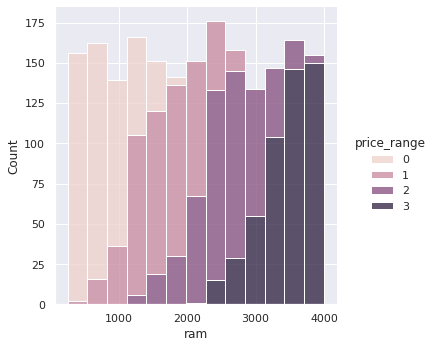

In [28]:
sns.displot(data=df_train, x="ram", hue="price_range", multiple="stack");

- 성능이 높은 램이 고가격대의 핸드폰에 많은 것을 알 수 있습니다.

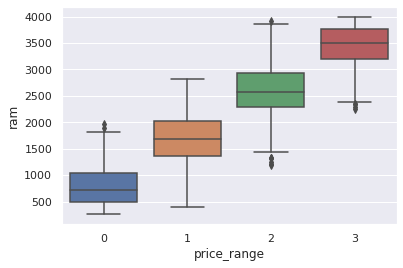

In [29]:
# 박스플롯
sns.boxplot(x='price_range', y='ram', data=df_train)
plt.show()

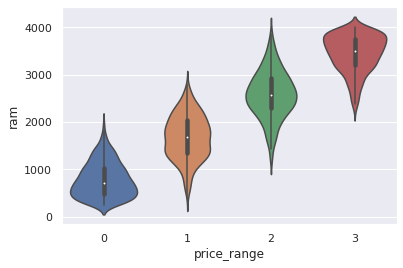

In [30]:
# 바이올린 플롯
sns.violinplot(x='price_range', y='ram', data=df_train)
plt.show()

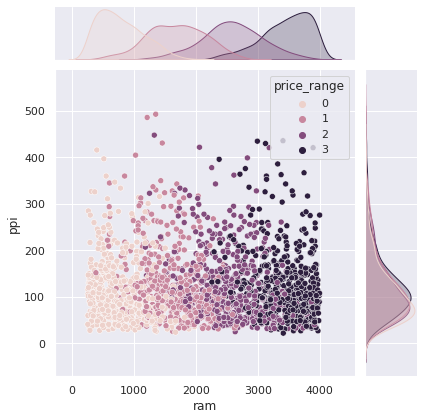

In [31]:
# ram과 ppi 가격 범위별
sns.jointplot(data=df_train, x='ram', y='ppi', hue='price_range');

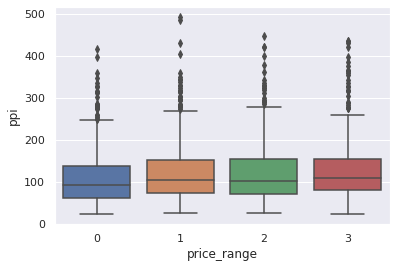

In [32]:
#가격과 PPI
sns.boxplot(x='price_range', y='ppi', data=df_train)
plt.show()

- 램과 ppi를 가격대별로 봤을 때 램성능이 높아도 ppi가 떨어지는 핸드폰도 있다는 것을 볼 수 있습니다.

- 가격과 상관없이 ppi는 고르게 분포되어 있는 것을 볼 수 있습니다.

- PPI가 높을수록 표현할 수 있는 픽셀수가 많아져 더 정교하고 섬세한 이미지 표현이 가능하지만 동일한 해상도일 경우, 화면 사이즈가 작을수록 PPI가 높기 때문에 핸드폰의 가격과 별다른 상관이 없는듯합니다.

- 또한 거리에따라서 육안으로 해상도를 구분하기도 어렵고 너무 높은 경우 배터리 효율이나 속도에 영향을 미치므로 PPI(pixels per inch·인치당 픽셀수)가 높으면 당연히 가격이 높을 것으로 예상했지만, 핸드폰 크기에 따라서 적당한 PPI값을 잡는 것 같습니다.

### **배터리와 가격**

In [33]:
df_train['battery_power'].groupby(df_train['price_range']).agg(['sum','mean', 'count'])

,sum,mean,count
price_range,,,
0,558451,1116.902,500
1,614434,1228.868,500
2,614160,1228.320,500
3,689992,1379.984,500


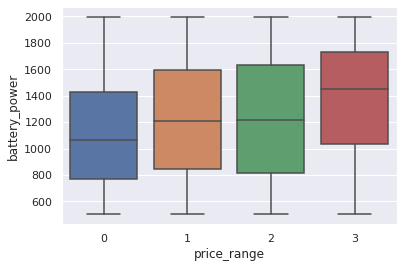

In [34]:
sns.boxplot(x='price_range', y='battery_power', data=df_train);

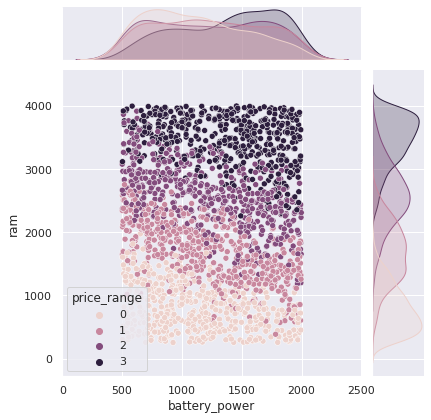

In [35]:
sns.jointplot(data=df_train, x='battery_power', y='ram', hue='price_range');

- 고가의 모델일수록,램성능이 좋아질수록 배터리 용량도 커지는 것을 볼 수 있습니다.

- 고가의 모델의 휴대폰일수록 다양한 기능과 효과적인 성능발휘를 위해서 전력소모량이 커지는 만큼 배터리 용량도 커지는 것을 볼 수 있습니다.

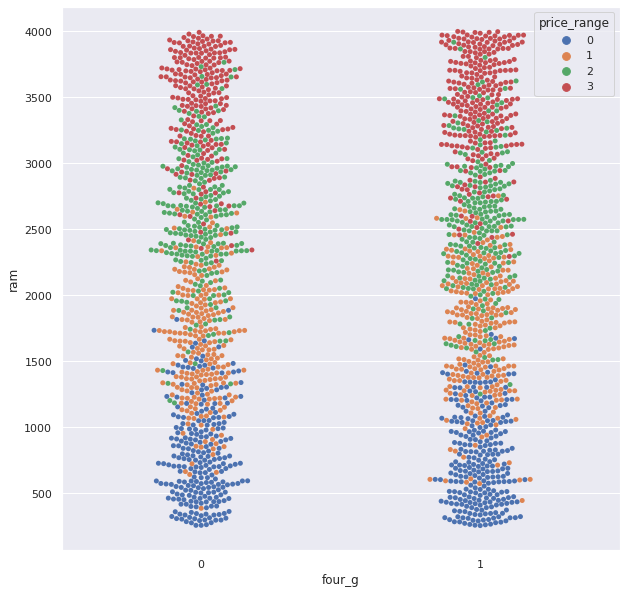

In [36]:
f, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(x='four_g', y='ram', hue='price_range',data=df_train)
plt.show()

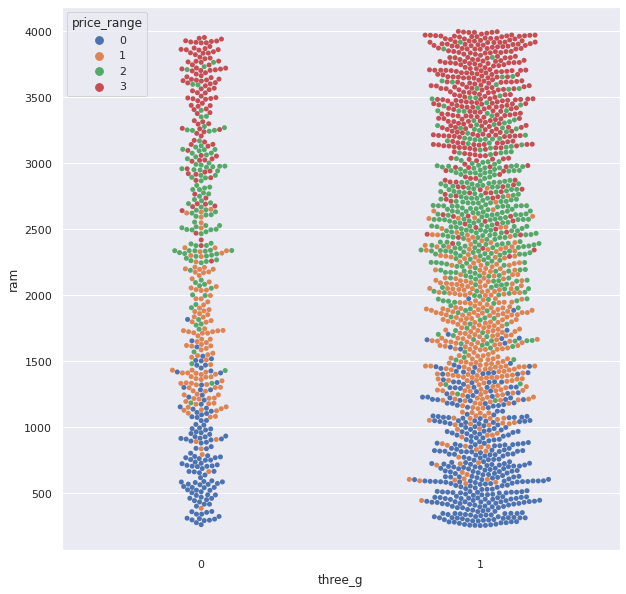

In [37]:
f, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(x='three_g', y='ram', hue='price_range',data=df_train)
plt.show()

- 4G가 있다고 해서 가격이 높고 램성능이 높은 것은 아니었습니다.

- 3G, 4G, 5G에 상관없이 플래그십 모델은 램성능도 좋고 가격도 높은 것으로 보입니다.

- 이동통신기술의 변화에 따라서 휴대폰도 통신기술 변화만 적용하고 가격별로 휴대폰을 새로 출시하는 것 같습니다.

- 3G 가 있는 모델과 없는 모델의 수가 많이 차이나는 것 같습니다. 2G에서 3G로 스마트폰이 생기면서 이러한 변화가 생긴 것 같습니다.

## **4. 모델 학습**

### **훈련 검증 테스트 세트 나누기**

- 훈련데이터는 모델을 fit 하는데 사용.
- 검증데이터는 예측 모델을 선택하기 위해 예측의 오류를 측정할 때 사용
- 테스트데이터는 일반화 오류를 평가하기 위해 마지막에 한번 사용.

In [38]:
# 훈련/검증/테스트 나누기
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_train, test_size = 0.2, random_state=1)
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (1600, 22)
val shape:  (400, 22)


In [39]:
test = df_test
print("test shape: ", test.shape)

test shape:  (1000, 21)


### **baseline 모델**

In [40]:
# 타겟을 설정.
# 0 = 저가, 1 = 보통, 2 = 고가, 3 = 최고가
target = "price_range"

In [41]:
# 타겟 데이터 범주의 비율을 확인합니다.
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.25500
1    0.25250
3    0.24625
2    0.24625
Name: price_range, dtype: float64

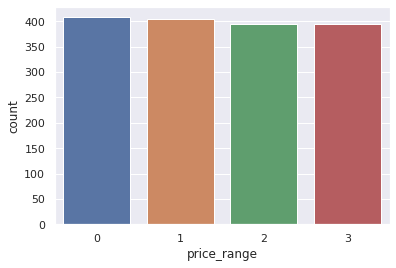

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [43]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

In [44]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.255


In [45]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.23


- 휴대폰 기능에 따른 가격범위를 구분하는 다중분류 문제입니다.
- 정확도(Accuracy)를 평가지표로 균형잡힌 데이터로 1개의 클래스의 빈도로 정확도를 확인해봤을때 각각의 가격 범위가 1/4 확률로 나누어질 것으로 예상됩니다.

### **의견**

- 현재 새로 휴대폰 시장에 진출하려는 신생기업으로 타사 휴대폰의 데이터를 사용해 기능에 따른 가격 범위를 구분하는 모델을 통해 대략적인 가격을 정하는 법을 알아낸다면, 향후 시장에서 어떤 가격 정책을 펼칠지, 어떤 기능을 통해서 가격을 조절해야할지 대략적으로 파악이 가능할 것이라 예상합니다.

- 이에 price_range를 target으로 잡고

- EDA를 통해서 얻은 인사이트로 주요한 feature 값을 사용해 모델을 만들어 보도록 하겠습니다.

In [46]:
# 상관관계 정리
corrmat = df_train.corr()
corrmat['price_range'] = abs(corrmat['price_range']) 
new = corrmat.sort_values(by=['price_range'])
new['price_range'] 

m_dep            0.000853
n_cores          0.004399
clock_speed      0.006606
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
mobile_wt        0.030302
touch_screen     0.030411
pc               0.033599
sc_w             0.038711
int_memory       0.044435
ppi              0.081011
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [47]:
feat_s = new[new['price_range'] >= 0.022]
feat_s['price_range']

sc_h             0.022986
three_g          0.023611
mobile_wt        0.030302
touch_screen     0.030411
pc               0.033599
sc_w             0.038711
int_memory       0.044435
ppi              0.081011
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [48]:
feat_s.index

Index(['sc_h', 'three_g', 'mobile_wt', 'touch_screen', 'pc', 'sc_w',
       'int_memory', 'ppi', 'px_height', 'px_width', 'battery_power', 'ram',
       'price_range'],
      dtype='object')

- 상관관계가 0.022보다 높은 feature 값을 설정해 모델을 만들겠습니다.

In [49]:
# feature 선택
features = ['sc_h', 'three_g', 'mobile_wt', 'touch_screen', 'pc', 'sc_w',
       'int_memory', 'ppi', 'px_height', 'px_width', 'battery_power', 'ram',
       'price_range']

In [50]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

## **알고리즘 선택**
- 3개 이상의 카테고리 데이터를 분류하는 모델을 생성하기 위해서

1. **Multiclass logistic regression**
    - 매우 잘 알려진 통계 기법
    - 다양한 분류 문제에 활용 가능
    - 굉장히 데이터가 간단할때 빠른 속도로 모델을 만들어 줌

2. **Multiclass decision forest**
    - 복잡한 데이터, 높은 정확도
    - 효율적인 메모리 사용

를 사용해 모델을 만들어 보겠습니다.



### Multiclass logistic regression

- multi_class = 'multinomial'을 설정해 모델을 만들어 보겠습니다.

- **다항분포** : 여러 개의 값을 가질 수 있는 독립확률변수들에 대한 확률 분포로, 여러 번의 독립적 시행에서 각각의 값이 특정 횟수가 나타날 확률을 정의한다.


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [52]:
# Multiclass logistic regression
# 파라미터는 적당한 값을 넣어준다.
%%time
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C=1,
                               class_weight = 'balanced',
                               random_state = 1,
                               multi_class = 'multinomial',
                               n_jobs = -1,
                               solver = 'lbfgs').fit(X_train, y_train)

print("학습결과 :", log_model.score(X_train, y_train))
print("검증결과 :", log_model.score(X_val, y_val))

학습결과 : 0.65125
검증결과 : 0.62
CPU times: user 47.9 ms, sys: 35.7 ms, total: 83.6 ms
Wall time: 1.1 s


In [53]:
# 정밀도와 재현율을 확인해봅시다
pred_train = log_model.predict(X_train)
pred_val = log_model.predict(X_val)
print("classification_report : 학습데이터")
print(classification_report(y_train, pred_train))

classification_report : 학습데이터
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       408
           1       0.57      0.53      0.55       404
           2       0.51      0.51      0.51       394
           3       0.68      0.76      0.72       394

    accuracy                           0.65      1600
   macro avg       0.65      0.65      0.65      1600
weighted avg       0.65      0.65      0.65      1600



In [54]:
# 검증 정밀도와 재현율
print("classification_report : 검증데이터")
print(classification_report(y_val, pred_val))

classification_report : 검증데이터
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        92
           1       0.53      0.55      0.54        96
           2       0.47      0.42      0.45       106
           3       0.68      0.75      0.71       106

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



- Multiclass logistic regression의 경우 학습데이터는 0.65 정확성으로 생각보다 많은 성능이 나오지 않은 상태입니다.

- 또한 0인 3은 분류가 잘되는 것 같지만 1, 2는 분류가 잘되지 않는 것 같습니다.

- 검증데이터에서는 훈련데이터에서 보다 정확도가 0.62로 떨어진 것을 확인할 수 있었습니다. 

- 다른 알고리즘을 통해 모델을 만들고 비교 후 성능이 좋은 모델을 토대로 성능향상을 해보도록 하겠습니다.

### Multiclass decision forest

In [55]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier(criterion ='entropy',
                                        max_depth = 3,
                                        random_state = 42).fit(X_train, y_train)

print("학습결과 :", dec_tree_model.score(X_train, y_train))
print("검증결과 :", dec_tree_model.score(X_val, y_val))

학습결과 : 0.77
검증결과 : 0.7375


### Random Forest
> 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

*훈련 세트에서 중복을 허용해서 샘플링하는 방법을 배깅*

- **장점**
    - 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음.
    - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
    - 다양한 분야에서 좋은 성능을 나타냄

- **단점**
    - 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 소요됨

- **하이퍼 파라미터**

- n_estimators	
    - 결정트리의 갯수를 지정 
    - Default = 10 
    - 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음

- min_samples_split	
    - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용 
    - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

- min_samples_leaf	
    - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 
    - min_samples_split과 함께 과적합 제어 용도 
    - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요

- max_features	
    - 최적의 분할을 위해 고려할 최대 feature 개수  
    - Default = 'auto' (결정트리에서는 default가 none이었음) 
    - int형으로 지정 →피처 갯수 / float형으로 지정 →비중 
    - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정 
    - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정

- max_depth	
    - 트리의 최대 깊이 
    - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할 
    - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

- max_leaf_nodes	
    - 리프노드의 최대 개수

In [56]:
from sklearn.ensemble import RandomForestClassifier

rand_for_model = RandomForestClassifier(n_estimators = 10,
                                        criterion = 'entropy',
                                        random_state = 42).fit(X_train, y_train)

print("학습결과 :", rand_for_model.score(X_train, y_train))
print("검증결과 :", rand_for_model.score(X_val, y_val))

학습결과 : 0.994375
검증결과 : 0.755


- Multiclass decision forest 모델을 사용한 결과 Multiclass logistic regression 모델을 사용했을 때 보다 학습과 검증결과가 좋았습니다.

- RandomForestClassifier의 모델이 성능이 더 좋게 나왔는데 학습결과가 거의 1에 가깝습니다. 과적합이나 데이터 누수가 없는지 확인할 필요가 있습니다.

In [57]:
# 정밀도와 재현율을 확인해봅시다
pred_train = rand_for_model.predict(X_train)
pred_val = rand_for_model.predict(X_val)
print("classification_report : 학습데이터")
print(classification_report(y_train, pred_train))

classification_report : 학습데이터
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       0.99      0.99      0.99       404
           2       1.00      0.99      1.00       394
           3       1.00      1.00      1.00       394

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [58]:
# 검증 정밀도와 재현율
print("classification_report : 검증데이터")
print(classification_report(y_val, pred_val))

classification_report : 검증데이터
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        92
           1       0.69      0.62      0.66        96
           2       0.70      0.74      0.72       106
           3       0.87      0.76      0.81       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.75       400



In [59]:
%%time
pipe = make_pipeline(RandomForestClassifier(
                            n_estimators = 10,
                            criterion = 'entropy',
                            random_state = 42,
                            oob_score = True,
                           ))
pipe.fit(X_train, y_train)

print("학습결과 :", rand_for_model.score(X_train, y_train))
print("검증결과 :", rand_for_model.score(X_val, y_val))

학습결과 : 0.994375
검증결과 : 0.755
CPU times: user 87.7 ms, sys: 3.1 ms, total: 90.8 ms
Wall time: 94.8 ms


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


- 배깅을 사용하다보면 하나의 모델을 위해 어떤 데이터는 여러번 샘플링될 수도 있고 어떤 데이터는 이용되지 않을 수 있다. 일반적으로 훈련할 때 사용하는 데이터는 63% 정도이다. 나머지 37%는 oob(out of bag)라고 부릅니다. 훈련할 때 이 데이터를 사용하지 않으므로 마지막 테스트 데이터로 이용할 수 있습니다. oob_score=True로 해주면 훈련이 끝나는 후 자동으로 oob 평가를 수행합니다. 

In [60]:
pipe.named_steps['randomforestclassifier'].oob_score_

0.613125

- obb_score를 봤을때 모델의 성능이 그렇게 높지는 않은 것 같습니다.

- 하이퍼파라미터 튜닝을 통해 과적합도 조절하고 모델 성능도 끌어올려 보겠습니다.

### GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝

In [61]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8600


In [62]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 검증 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 1,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_val)

print("학습결과 :", rf_clf1.score(X_train, y_train))
print("검증결과 :", rf_clf1.score(X_val, y_val))

학습결과 : 0.97375
검증결과 : 0.865


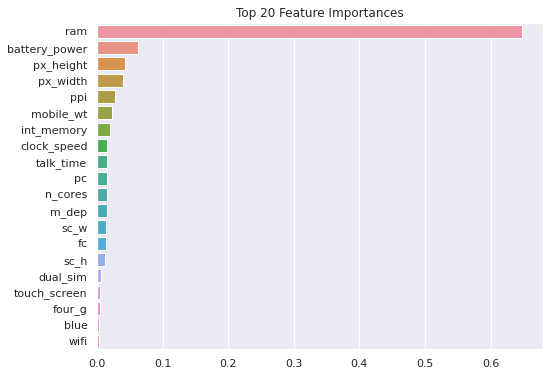

In [63]:
# Random Forest의 각 피처의 중요도 시각화 : featureimportances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [64]:
len(X_train['ram'].value_counts())

1311

- 특성 중요도가 높게 나온 ram의 경우는 cardinality가 높아 과적합의 위험이 있습니다.

- XGBClassifier을 사용해 high cardinality 특성을 줄여보도록 하겠습니다.

In [65]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth= 10  #high cardinality 특성을 위해 기본보다 높여 보았습니다.
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

XGBoost

- scale_pos_weight (imbalanced 클래스인 경우)
- max_depth (낮은값에서 증가시키며 튜닝, 너무 깊어지면 과적합)
- n_estimators (작을경우 과소적합, 높을경우 긴 학습시간) 
- learning_rate (작을경우 과소적합, 높을경우 과적합)

In [66]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.89
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        88
           1       0.90      0.81      0.85       106
           2       0.84      0.86      0.85       104
           3       0.92      0.95      0.93       102

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



- XGBoost을 사용해 모델의 성능을 개선했습니다.
- 검증 정확도가 0.89인 모델이며, 0, 1, 2, 3의 가격 범위 모두 precision과 recall 값도 양호하며 f1-score도 비교적으로 잘 나온 모델입니다.

Precision의 경우 Model이 true라고 예측한 값 중 실제로 true일 확률이고

recall의 경우 실제 True중 Model이 true라고 예측한 것입니다.

##**5. 결론**

- SHAP, PDP 등을 통해 모델이 관측치를 어떤 특성을 활용했는지, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석해 보겠습니다.

In [67]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 75kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=96058cb2d34dcdfbbc0734a4a875e8dc06c44963d7ed03af619f6ce01ee042f1
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 358kB 6.8MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490498 sha256=24f1bbc944a12f0f10585b1aef02c245882f193df601aaaf0749bf2eca2a55a5
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [68]:
%%capture

# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

### PDP(1개 특성)

In [69]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [70]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ram'

- **XGBoost 모델에서 ram 특성의 PDP를 그려봤습니다**

- 특성 값에 따라서 타겟값이 증가 감소하는가 알 수 있다. 
- Partial Dependence Plot의 가장 큰 장점은 종속 변수와 관심 있는 독립 변수의 관계가 선형인지, 단조적인지, 복잡한치(고차) 다양한 형태의 관계를 볼 수 있습니다.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


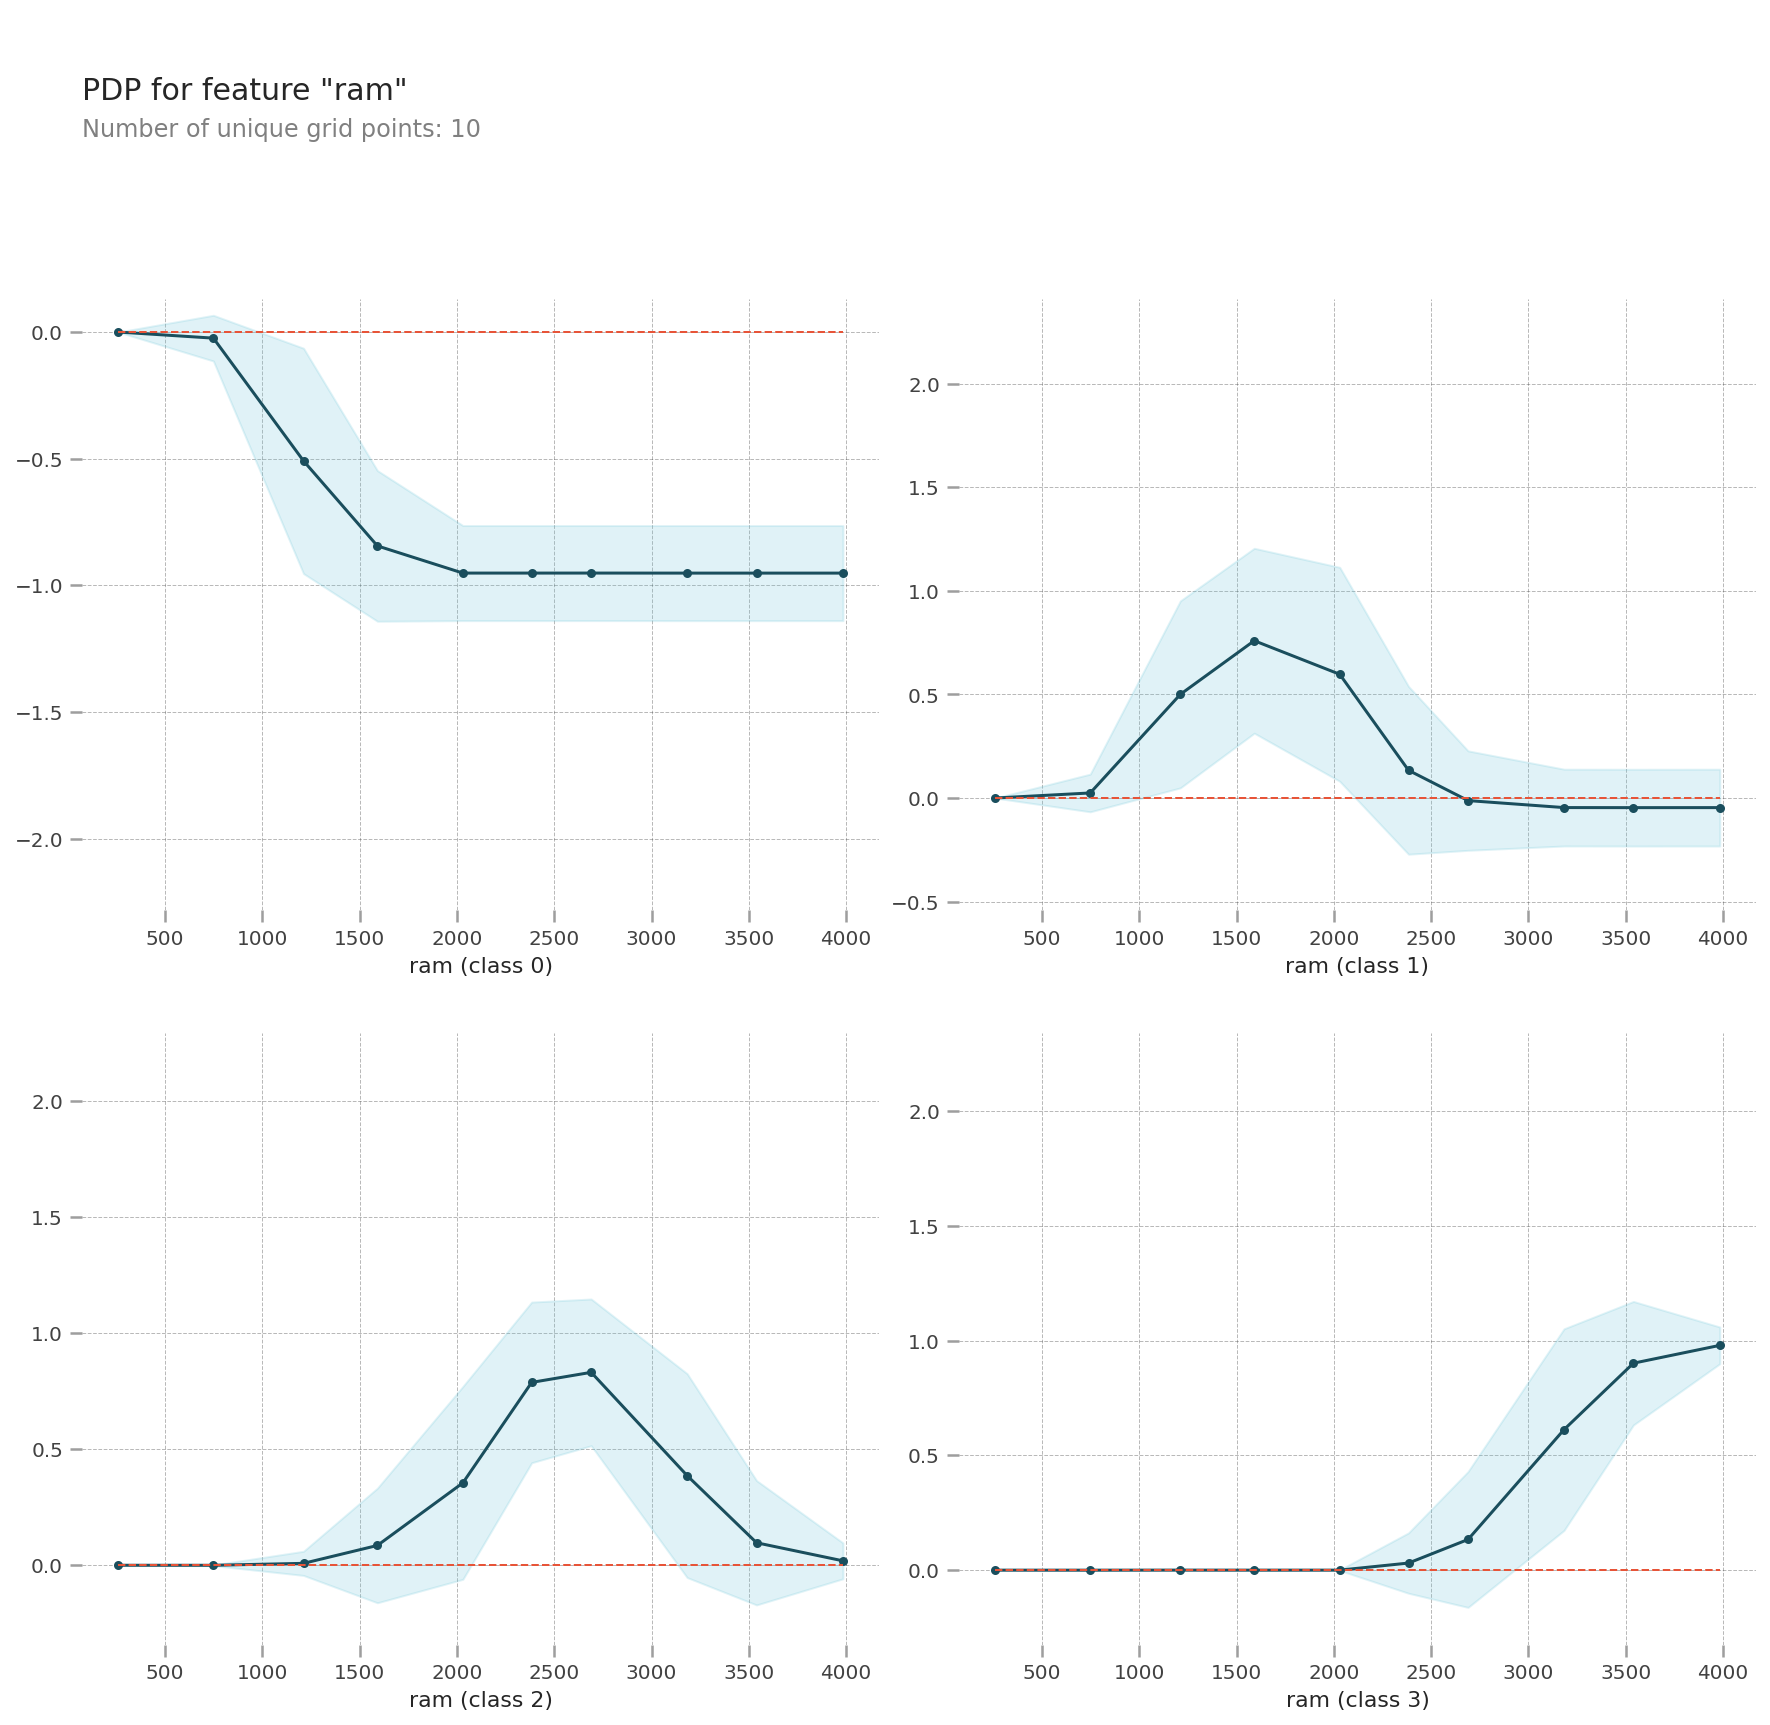

In [71]:
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

- class 0  : ram 성능이 대체적으로 낮은 경우가 많으며, 1000 미만일 때 저가형으로 구분되는 듯합니다.
- class 1 : ram 성능이 1000 ~ 2500 사이일때 보급형 휴대폰으로 구분되며
- class 2 : ram 성능이 1500 ~ 3500 사이일때 고급형 휴대폰
- class 3 : ram 성능이 2000이상 부터 최고급형 휴대폰으로 구분됩니다.

**휴대폰의 가격이 올라 갈수록 램의 성능도 높아지고 저가, 보급, 고급, 최고급 등급에 따라 장착되는 램 성능으로 가격대를 구성하는 것 같습니다.**

In [72]:
X_val['ram'].value_counts()

3970    2
2073    2
1214    2
3764    2
574     2
       ..
2385    1
3411    1
1324    1
1440    1
3072    1
Name: ram, Length: 383, dtype: int64

### PDP(2개 특성)

In [73]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [74]:
features = ['ram', 'battery_power']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


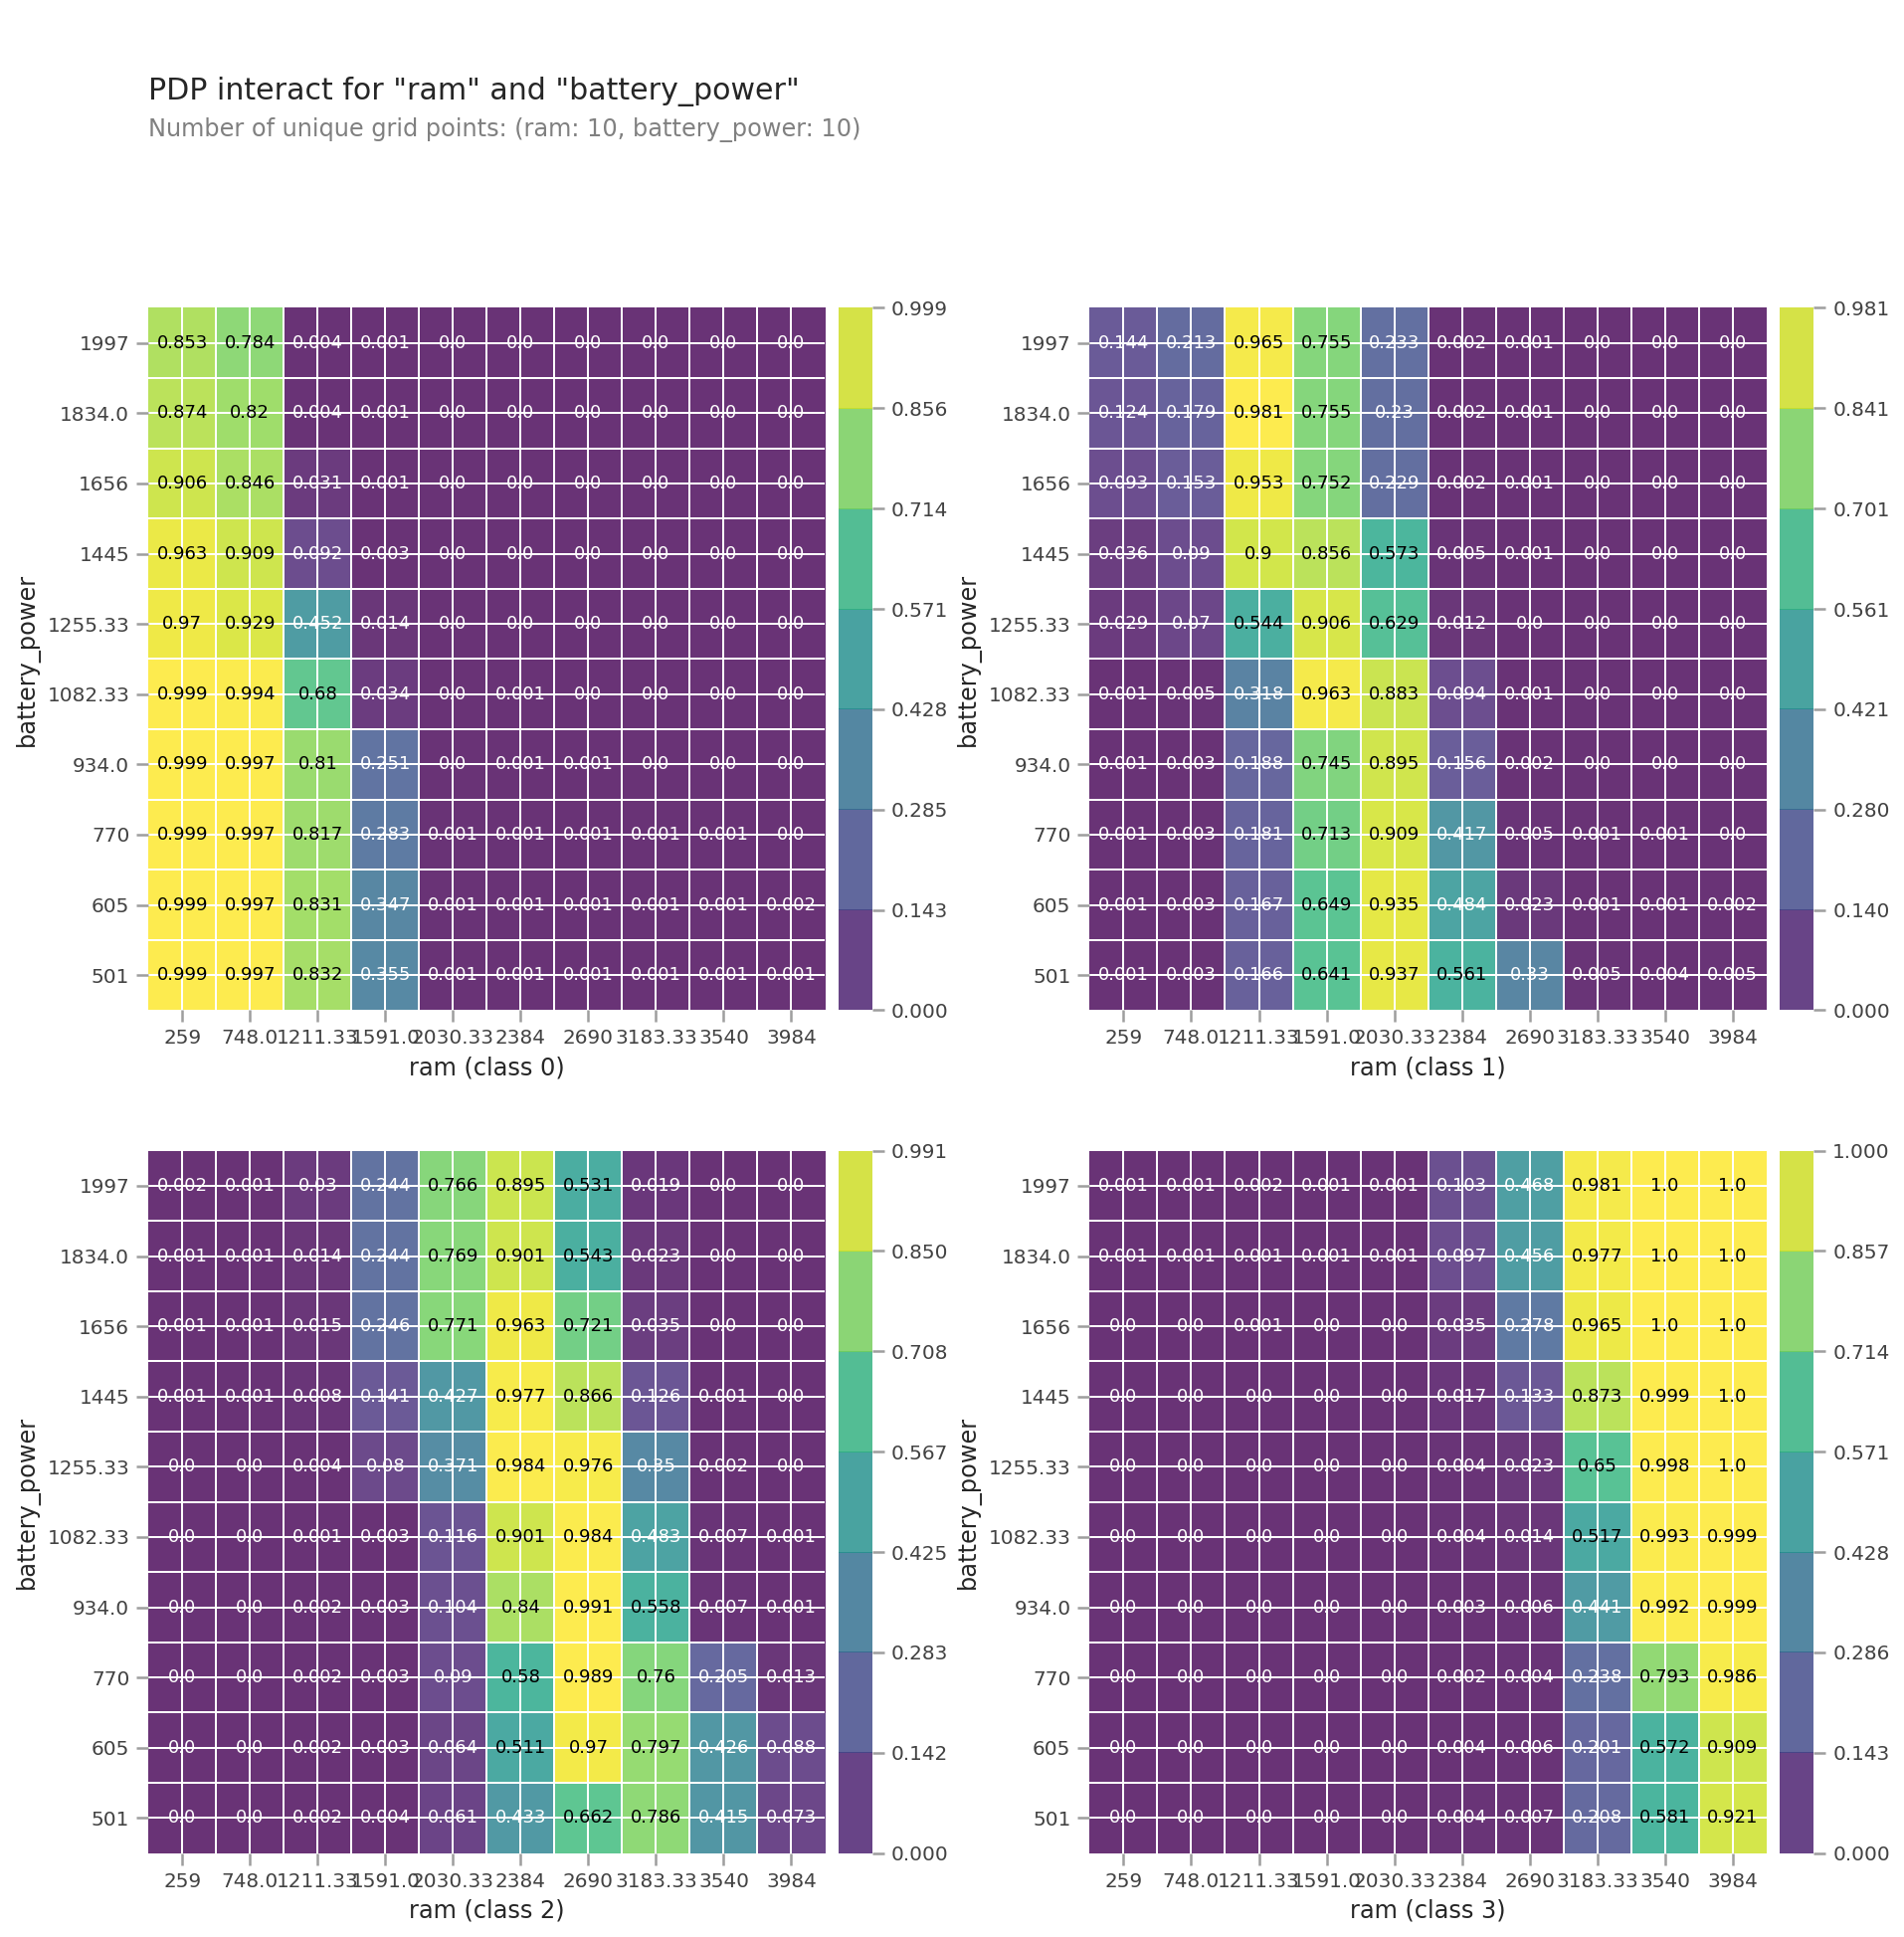

In [75]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- ram 성능에 따라서 bettery_power 용량이 바뀌는데, ram 성능이 좋으면 better_power 용량도 좋은것으로 보입니다.
- 또한 저가형, 보급형, 고급형 핸드폰에 따라 상위모델로 갈수록 ram과 배터리 성능도 올라가는 것을 볼 수 있습니다
- 또한 ram이 낮더라도 배터리 용량이 좋은 경우도 있습니다. 이 경우는 최근의 나온 모델의 경우는 배터리 용량이 개선되어 나오는 경우도 있기 때문인듯합니다.

**ram 성능이 좋고 배터리 용량이 클수록 가격이 비싼 핸드폰으로 구분됩니다.**

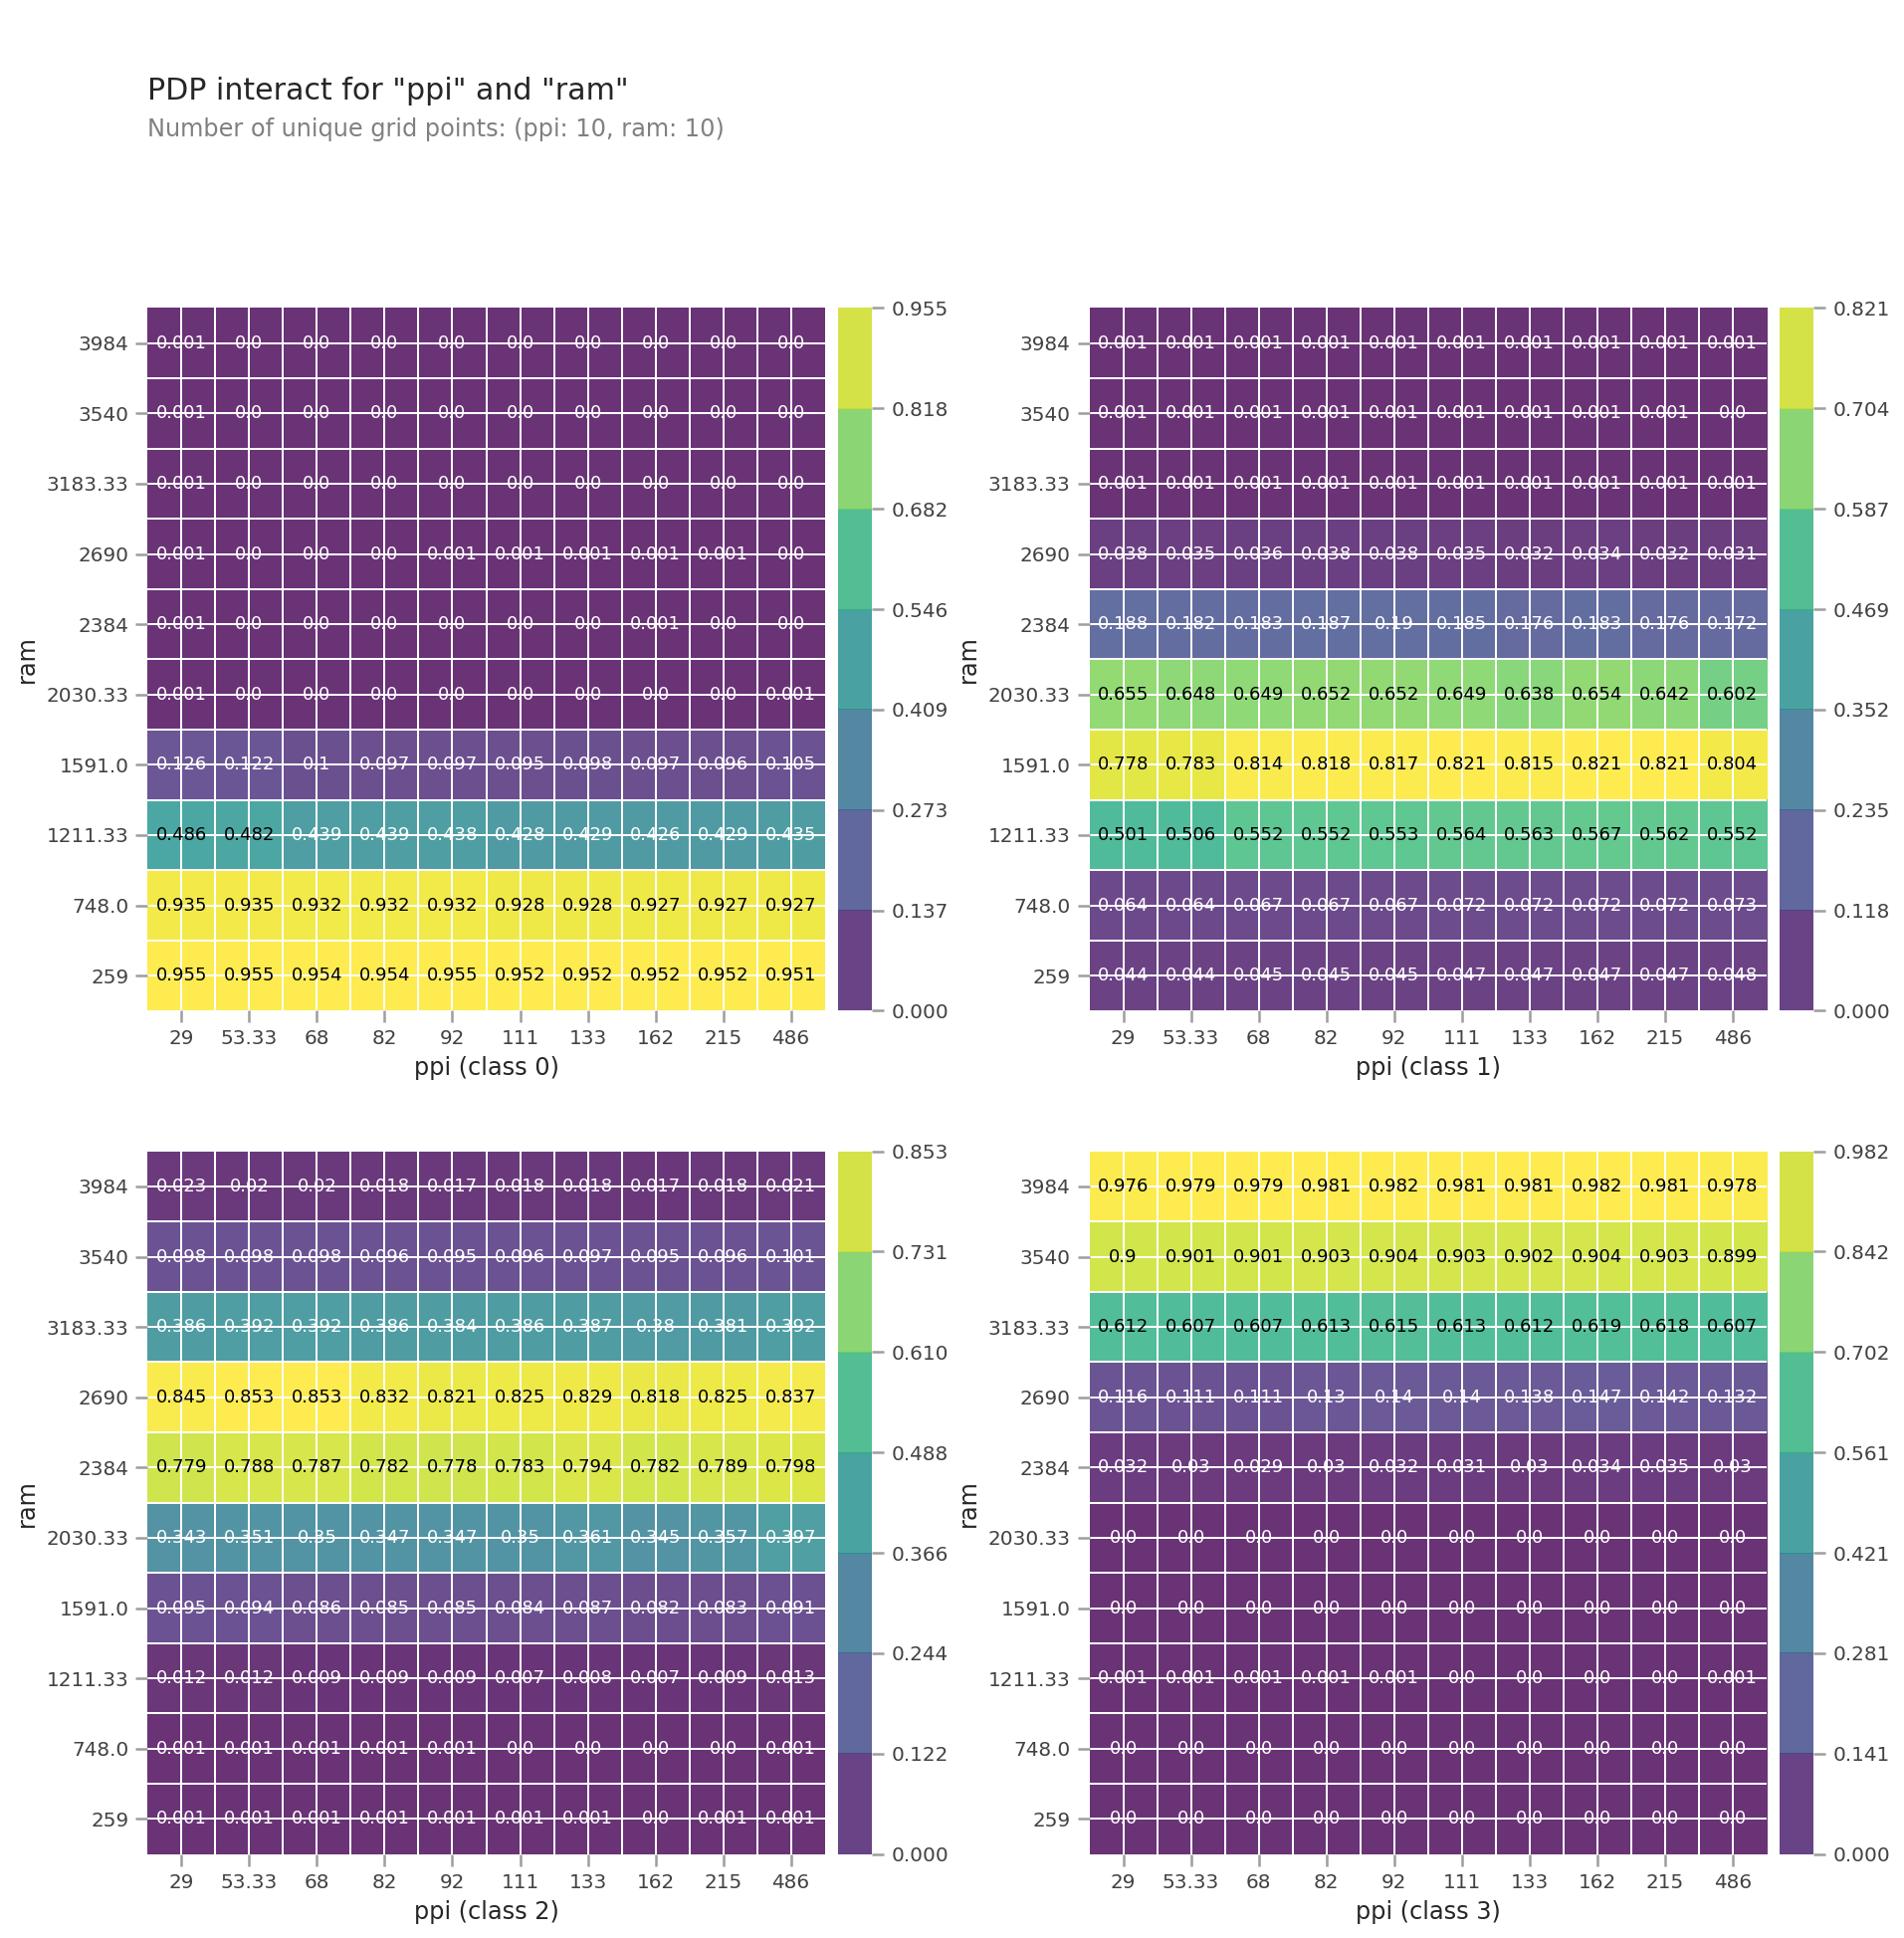

In [133]:
# 2D PDP
features = ['ppi', 'ram']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

- ppi와 ram이 가격에 미치는 영향을 봤을때
- ppi와 ram의 경우 별다른 관계는 없어 보입니다.
- ram은 성능이 좋을 수록 가격에 영향을 많이 미친 것으로 보이고 ppi는 저가형, 보급형, 고가형 가격에 상관없이 특정 램 성능에 맞춰 고르게 분포되어있습니다.

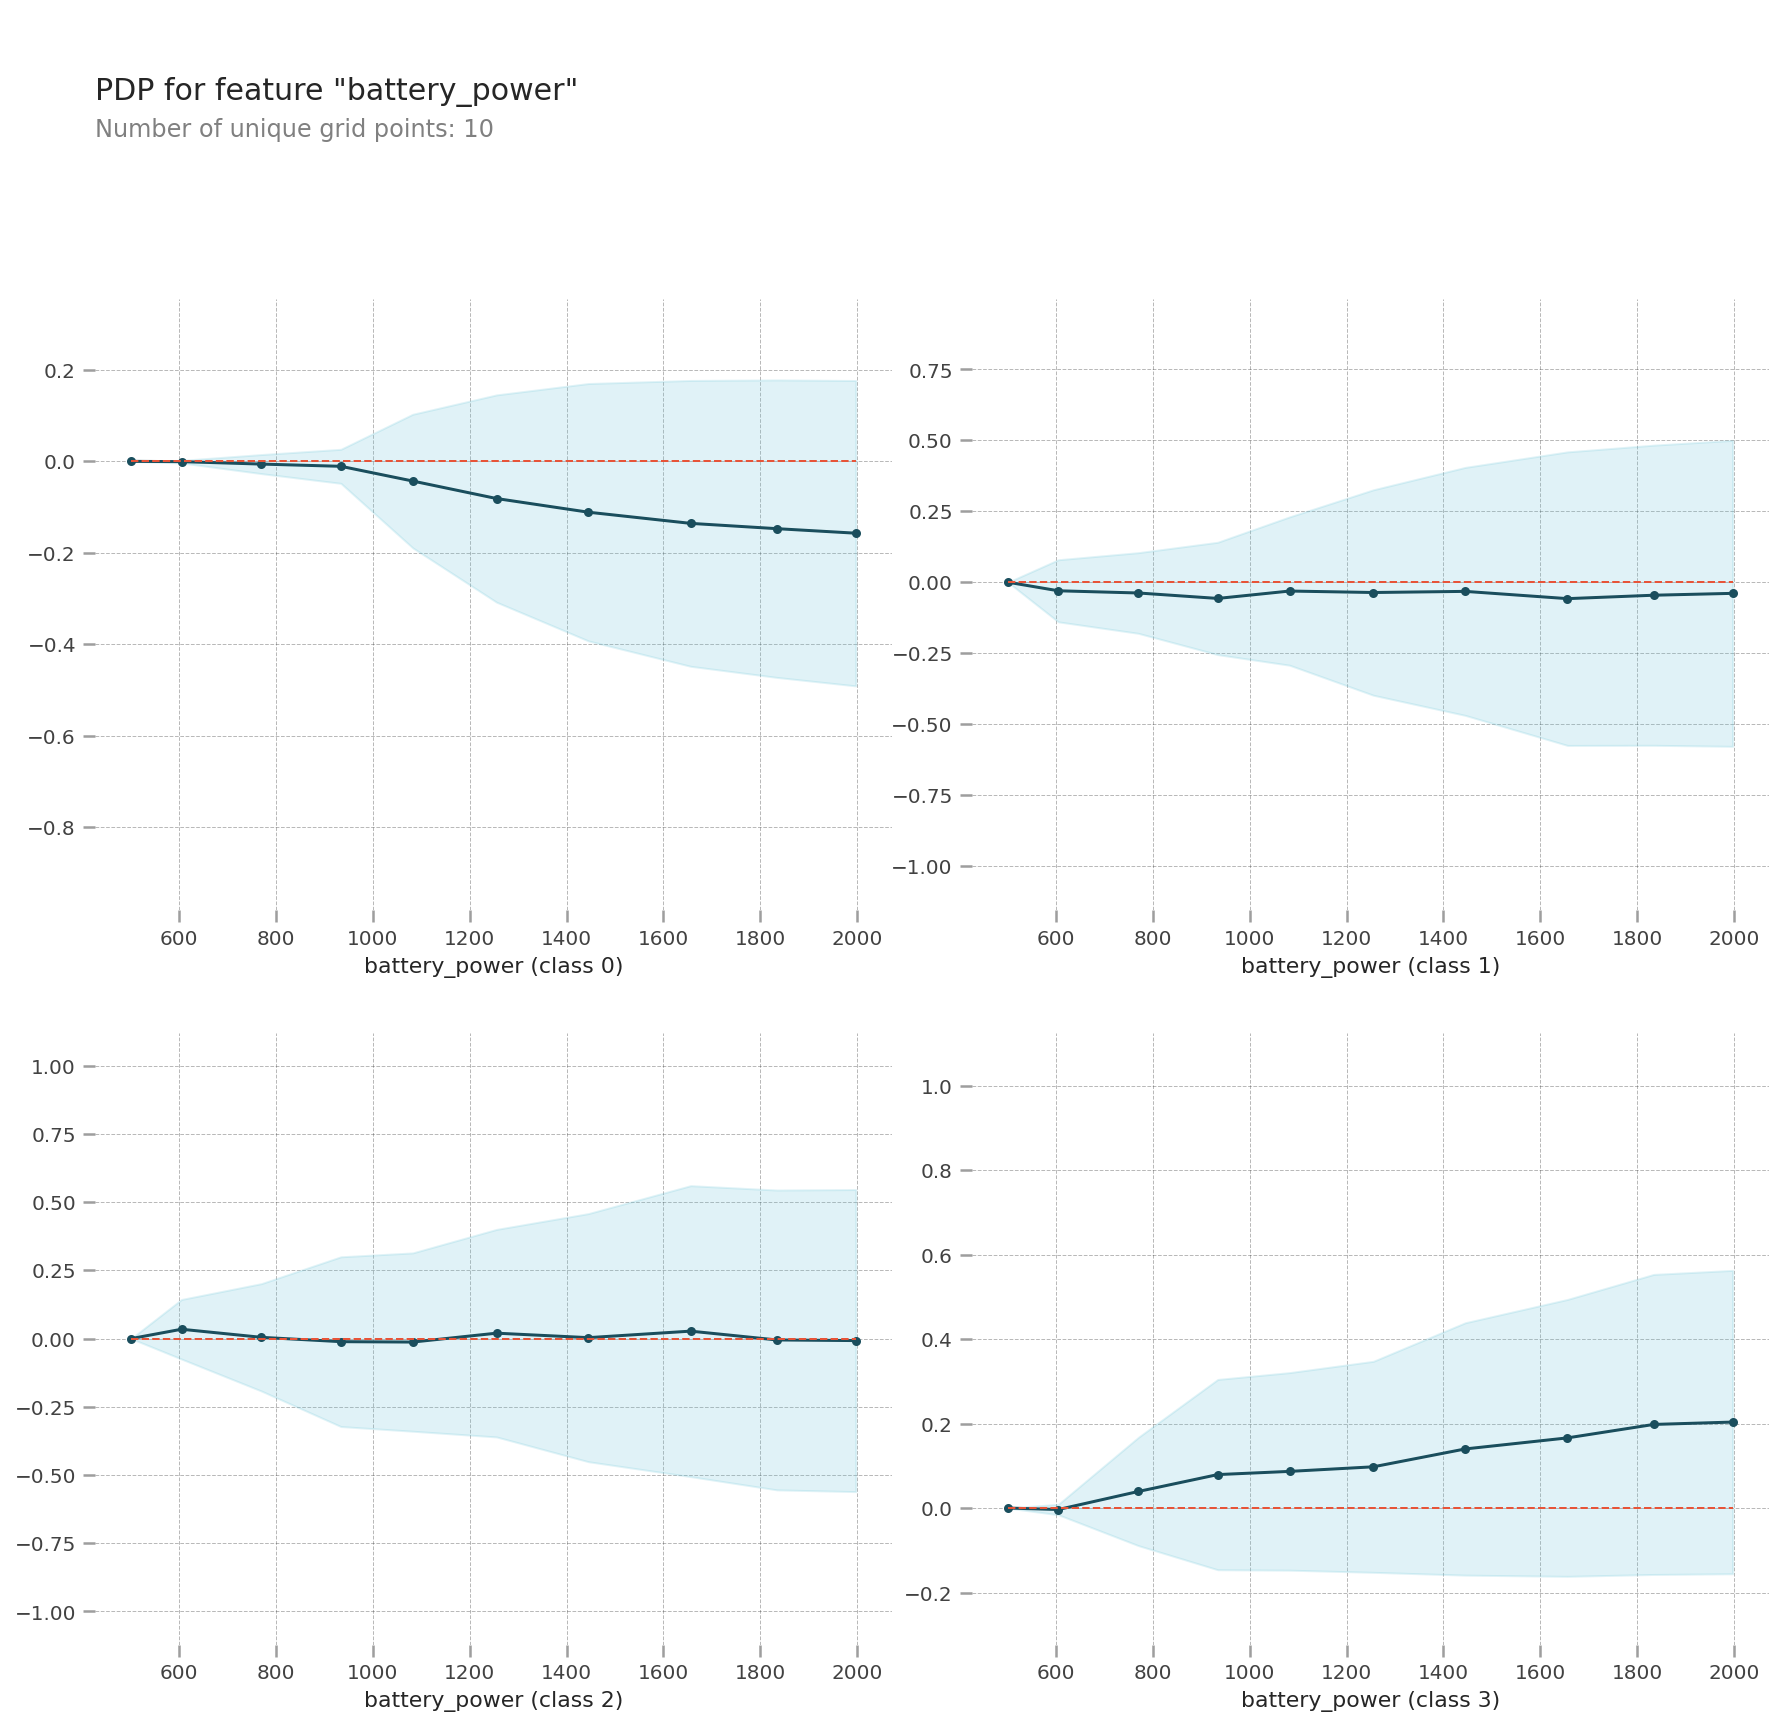

In [134]:
feature = 'battery_power'
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

- 배터리 용량의 경우 
- class : 0 에서는 1000 미만부터 저가형으로 구분
- class : 1 에서는 대체적으로 고르게 되어 있으나 class : 2 고가형에 비해 성능이 살짝 낮게 구분되어 있으며
- calss : 3 의 경우 배터리 성능이 대체적으로 좋을 때 초고가형으로 구분되는 것을 살펴 볼 수 있습니다.

**ram 성능에 비해서 가격에 미치는 영향을 다소 적은 편에 속하나 배터리 성능도 가격에 미치는 영향을 무시할 수는 없을 정도입니다.**

### SHAP

In [113]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth= 10  #high cardinality 특성을 위해 기본보다 높여 보았습니다.
                  , learning_rate=0.2
                 )

model.fit(X_train, y_train);

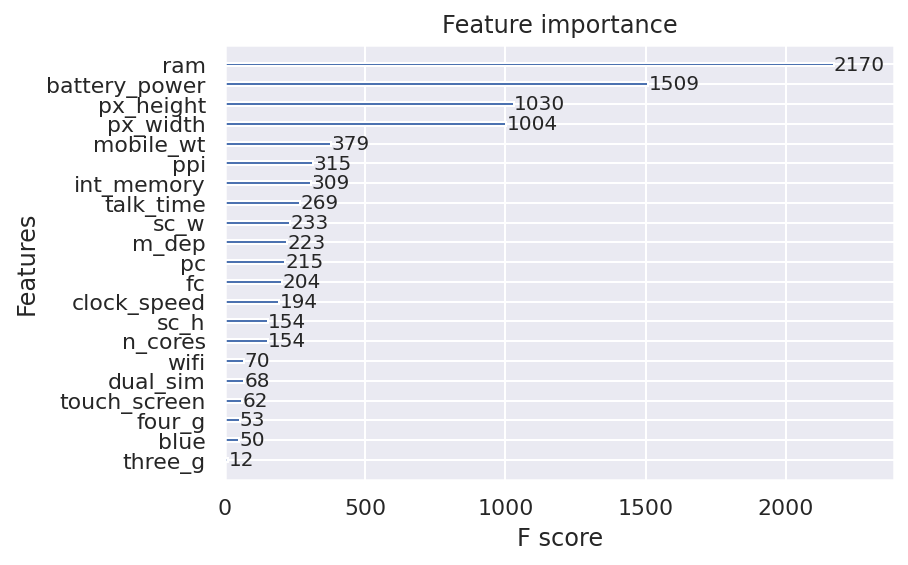

In [114]:
import shap
import numpy as np
import matplotlib.pylab as pl

from xgboost import plot_importance
plot_importance(model,)

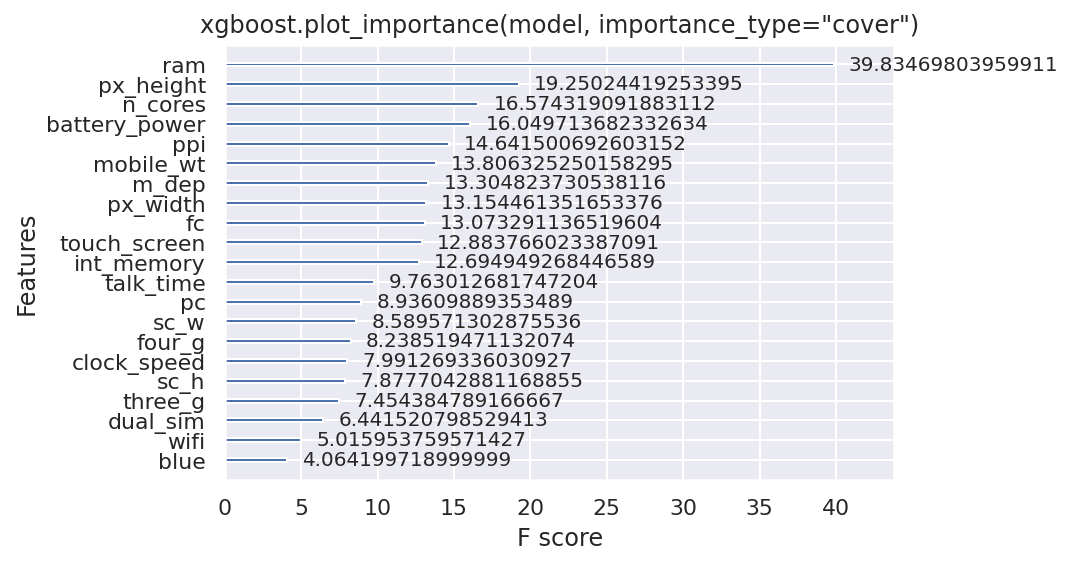

In [119]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

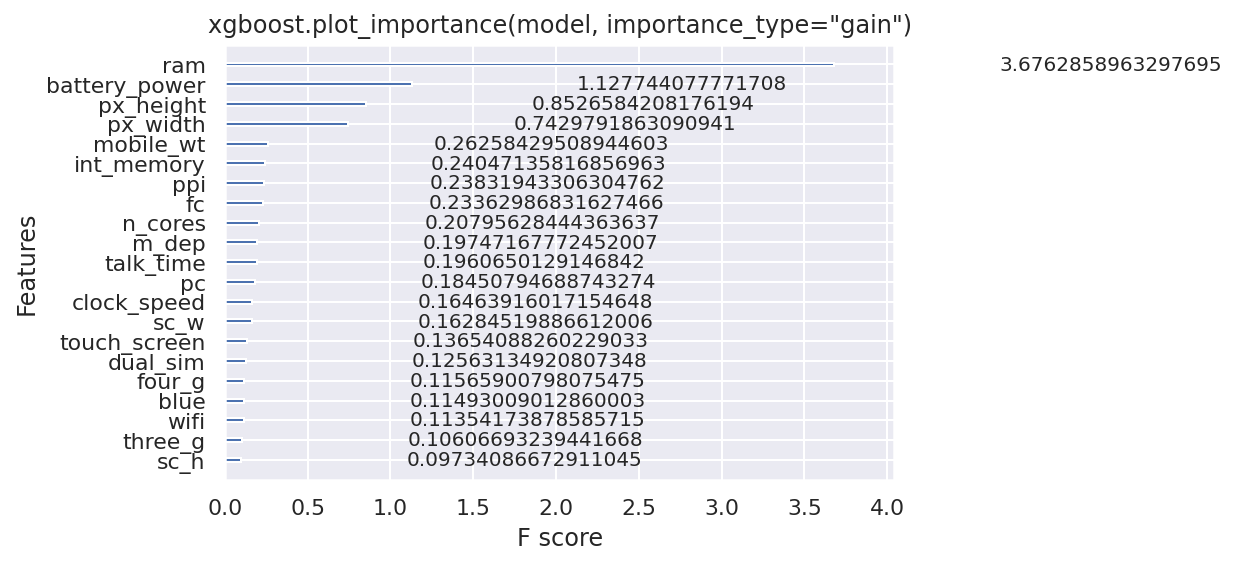

In [120]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [123]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

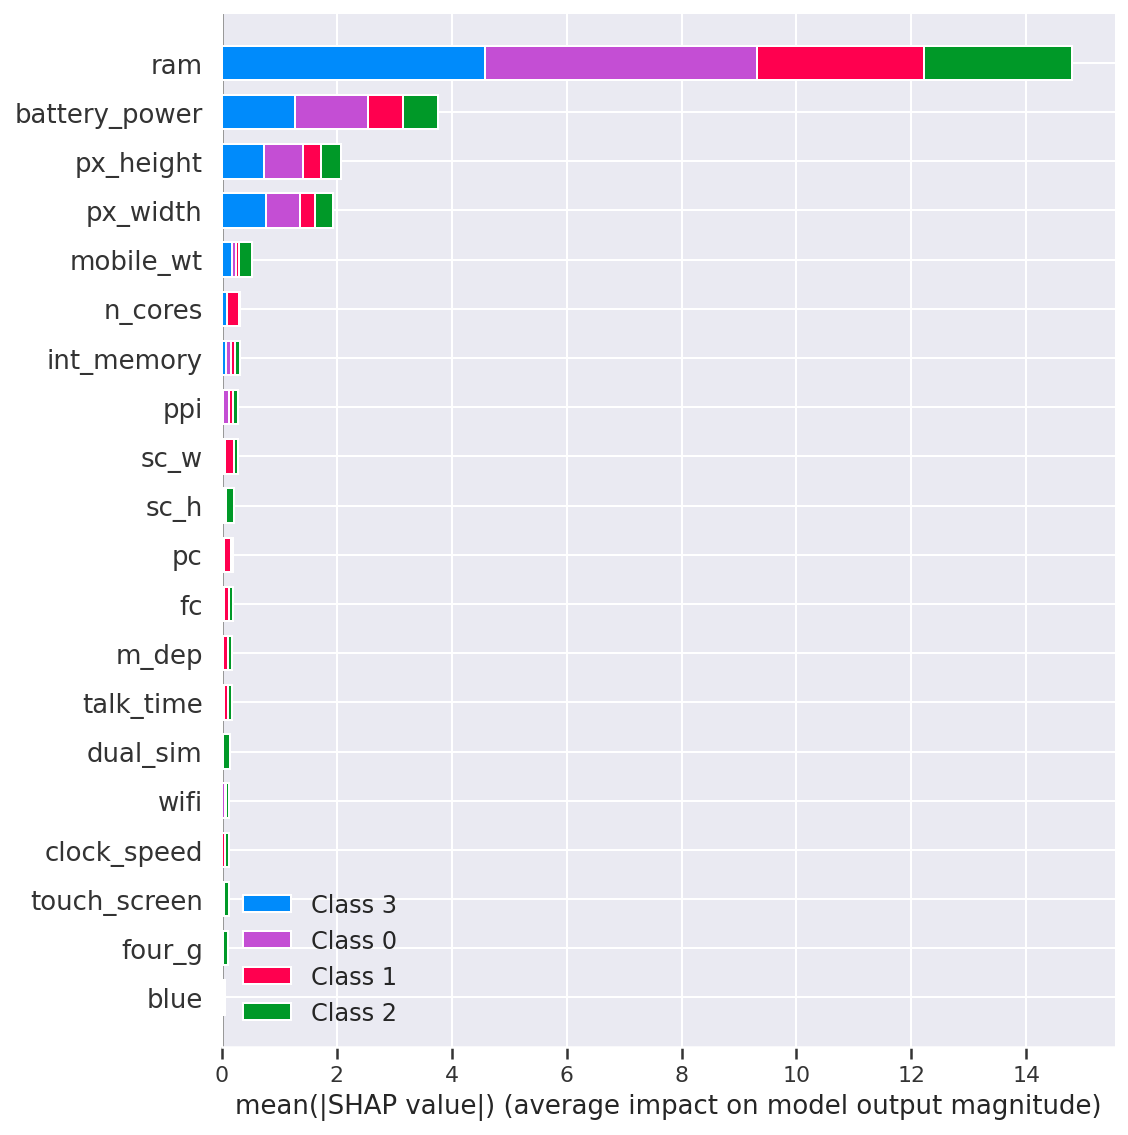

In [131]:
shap.summary_plot(shap_values, X_val, plot_type="bar")

- 가격에 영향을 미치는 주요한 요소는 ram, battery_power, px_height, px_width, mobile_wt 순으로 나타나며

- 가격이 비싸거나 싼 핸드폰일 수록 기능에 따른 가격에 영향을 많이 받습니다.

- 보급형이나 어느정고 고급형의 휴대폰의 경우 평균적인 스펙의 기능을 갖추고 있기에 기능에 따른 가격의 변동폭이 심하지 않을 것으로 예상됩니다.

### 최종의견

- 휴대폰 시장에 새로 진출하는 기업의 경우 해당 모델을 이용해 생산하는 휴대폰의 기능에 따라 적절한 가격을 책정할 수 있는 보조 도구로 이용할 수 있을듯합니다.

- 휴대폰 가격에 영향을 많이 미치는 3가지 요소는 ram 성능, 배터리 용량, 해상도 등이 있으며, 다른 부가적인 기능의 경우 필수적으로 들어가야하는 기능 즉 기본 기능일 것으로 예상됩니다.

- 또한 휴대폰의 기능에 따른 가격의 범위를 설정할 수는 있지만 가격에 영향을 미치는 수요와 공급, 원가 등 다른 외부요인이 있기에 해당 산업에 대한 전문가의 의견을 추가적으로 추합해 적절한 가격을 산정하는 것이 중요하다 생각합니다.

- 모델을 의사결정에 도움을 주는 보조 수단이지 완전한 정답은 아니라고 생각합니다. 단지 빠르고 효율적으로 의사결정에 도움을 줄 수 있는 수단이라고 생각합니다.